In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from MCForecastTools import MCSimulation

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Get the data on gold ticker
gold = yf.Ticker("GC=F")

In [3]:
gold_df = gold.history(period="1d", start="2000-01-01", end="2022-10-01").drop(columns=["Dividends","Stock Splits"])
gold_df.columns = ["open","high","low","close","volumne"]
gold_df.index.names =["timestamp"]
gold_df = pd.concat([gold_df], axis=1, keys=["XAU"])

<AxesSubplot:title={'center':'Gold Value'}, xlabel='Time', ylabel='Price'>

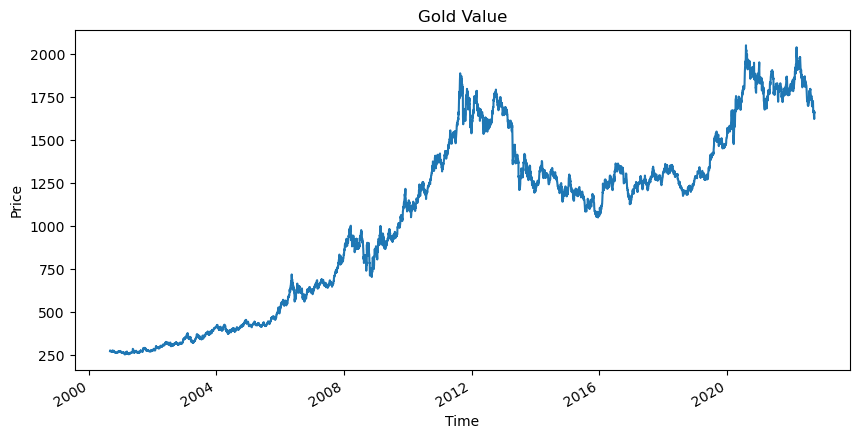

In [4]:
gold_df["XAU"]["close"].plot(title = "Gold Value", xlabel = "Time", ylabel = "Price", figsize = (10,5))

In [5]:
gold_df.head()

XAU                                      \
                                 open        high         low       close   
timestamp                                                                   
2000-08-30 00:00:00-04:00  273.899994  273.899994  273.899994  273.899994   
2000-08-31 00:00:00-04:00  274.799988  278.299988  274.799988  278.299988   
2000-09-01 00:00:00-04:00  277.000000  277.000000  277.000000  277.000000   
2000-09-05 00:00:00-04:00  275.799988  275.799988  275.799988  275.799988   
2000-09-06 00:00:00-04:00  274.200012  274.200012  274.200012  274.200012   

                                   
                          volumne  
timestamp                          
2000-08-30 00:00:00-04:00       0  
2000-08-31 00:00:00-04:00       0  
2000-09-01 00:00:00-04:00       0  
2000-09-05 00:00:00-04:00       2  
2000-09-06 00:00:00-04:00       0

In [6]:
gold_df.tail()

XAU                                         \
                                  open         high          low        close   
timestamp                                                                       
2022-09-26 00:00:00-04:00  1623.300049  1623.300049  1623.300049  1623.300049   
2022-09-27 00:00:00-04:00  1632.199951  1636.599976  1626.699951  1626.699951   
2022-09-28 00:00:00-04:00  1620.400024  1660.400024  1620.400024  1660.400024   
2022-09-29 00:00:00-04:00  1657.000000  1662.599976  1640.000000  1658.500000   
2022-09-30 00:00:00-04:00  1661.699951  1672.699951  1658.000000  1662.400024   

                                   
                          volumne  
timestamp                          
2022-09-26 00:00:00-04:00    1205  
2022-09-27 00:00:00-04:00     888  
2022-09-28 00:00:00-04:00   18311  
2022-09-29 00:00:00-04:00    6028  
2022-09-30 00:00:00-04:00     548

In [7]:
# Set number of simulations
num_sims = 1000

# Configure a Monte Carlo simulation to forecast three years daily returns
MC_XAU = MCSimulation(
    portfolio_data = gold_df,
    num_simulation = num_sims,
    num_trading_days = 252 * 5
)

In [8]:
# Run Monte Carlo simulations to forecast three years daily returns
MC_XAU.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008241,1.000109,0.999262,1.013717,1.008929,1.001341,1.003905,1.000422,0.989323,0.996222,...,1.014731,0.991499,0.988650,0.994372,1.008478,0.995230,0.996249,1.006238,1.014318,0.992644
2,1.022685,0.995241,1.003133,1.008423,1.005290,1.001642,1.005866,1.010718,0.991200,0.997909,...,1.009840,0.987666,0.984362,1.005654,1.011189,1.006897,0.977967,0.996719,1.022081,1.013161
3,1.027457,1.004738,1.034657,1.005948,1.004477,0.995299,1.002986,1.007551,1.009194,0.988432,...,1.014843,0.999006,0.978339,1.017167,1.016458,1.010183,0.967968,0.999779,1.033862,1.012126
4,1.023777,1.017688,1.045923,1.011070,1.013090,0.990999,1.033616,0.980704,0.996242,0.990570,...,1.020495,0.988698,0.973477,1.032583,0.995567,1.012488,0.958309,1.002303,1.038509,0.996458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.903622,1.457869,2.120777,1.179058,1.303243,1.352622,1.631706,1.174260,4.229717,2.346917,...,2.091782,1.995342,1.156941,2.230330,2.506572,2.318597,0.930567,1.735571,1.758896,1.138420
1257,0.912264,1.436034,2.096637,1.170920,1.320222,1.362884,1.626470,1.189076,4.182035,2.352268,...,2.072893,1.981204,1.133903,2.194037,2.472858,2.347704,0.929054,1.741529,1.724614,1.104545
1258,0.883888,1.430647,2.108777,1.149593,1.327855,1.358864,1.644399,1.212363,4.204836,2.388711,...,2.093601,1.952188,1.139267,2.189316,2.454094,2.319209,0.927060,1.716429,1.737301,1.109334
1259,0.877297,1.433730,2.109043,1.132130,1.296209,1.379763,1.652729,1.213346,4.239845,2.372323,...,2.061544,1.959852,1.124287,2.168381,2.402906,2.329623,0.916631,1.712318,1.735316,1.108484


In [9]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(MC_XAU.simulated_return.mean(axis=1)),
    "median": list(MC_XAU.simulated_return.median(axis=1)),
    "min": list(MC_XAU.simulated_return.min(axis=1)),
    "max": list(MC_XAU.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000806,1.000931,0.968376,1.034094
2,1.000904,1.001149,0.948615,1.049024
3,1.000971,1.001093,0.937123,1.059995
4,1.001704,1.002606,0.930974,1.091388


<AxesSubplot:title={'center':'Simulated Daily Returns Behavior of XAU Value Over the Next Year'}>

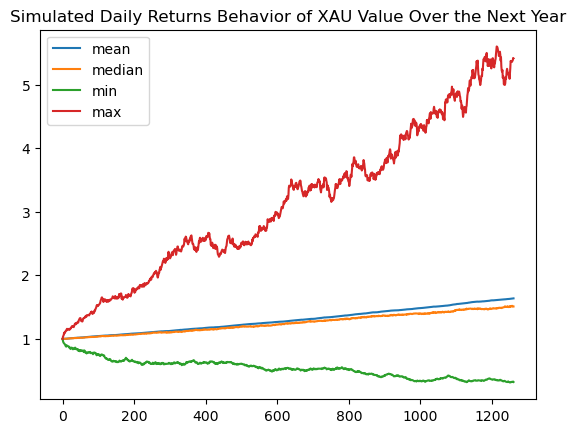

In [10]:
# Use the `plot` function to visually analyze the trajectory of XAU Value of daily returns on the next ten years of trading days simulation
df_simulated_returns.plot(title="Simulated Daily Returns Behavior of XAU Value Over the Next Year")

In [11]:
# Set initial investment
initial_investment = 350000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
cumulative_pnl = initial_investment * df_simulated_returns

# Display sample data
cumulative_pnl.head()

,mean,median,min,max
0,350000.000000,350000.000000,350000.000000,350000.000000
1,350282.262602,350325.754695,338931.549183,361932.967321
2,350316.275443,350402.266796,332015.213480,367158.498905
3,350339.860624,350382.648416,327992.931200,370998.107098
4,350596.317520,350912.078958,325840.890605,381985.962198


<AxesSubplot:title={'center':'Simulated Outcomes Behavior of XAU Value Over the Next Year'}>

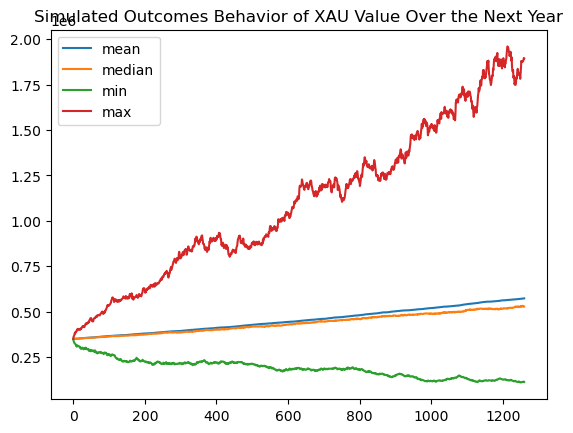

In [12]:
cumulative_pnl.plot(title="Simulated Outcomes Behavior of XAU Value Over the Next Year")

In [13]:
MC_XAU_sim_sum_stats = MC_XAU.summarize_cumulative_return()
display(MC_XAU_sim_sum_stats)

count           1000.000000
mean               1.637396
std                0.672739
min                0.322357
25%                1.165335
50%                1.509508
75%                2.011285
max                5.412682
95% CI Lower       0.687414
95% CI Upper       3.229776
Name: 1260, dtype: float64

In [16]:
MC_XAU_lower_thirty_cumu_return = MC_XAU_sim_sum_stats[8] * 350000
%store MC_XAU_lower_thirty_cumu_return
display(MC_XAU_lower_thirty_cumu_return)

Stored 'MC_XAU_lower_thirty_cumu_return' (float64)


240595.07031380714

In [17]:
MC_XAU_upper_thirty_cumu_return = MC_XAU_sim_sum_stats[9] * 350000
%store MC_XAU_upper_thirty_cumu_return
display(MC_XAU_upper_thirty_cumu_return)

Stored 'MC_XAU_upper_thirty_cumu_return' (float64)


1130421.5258112345